In [1]:
import pandas as pd


In [2]:
import numpy as np


In [3]:
import flask

In [4]:
df=pd.read_csv("Gemstone.csv",nrows=10000)

In [5]:
df

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,0.31,Premium,I,VS1,61.1,60.0,4.35,4.32,2.66,544
9996,9996,2.20,Premium,J,SI2,62.6,59.0,8.31,8.25,5.18,12787
9997,9997,2.05,Premium,D,SI2,58.8,59.0,8.32,8.26,4.93,10036
9998,9998,0.71,Ideal,E,VVS2,61.0,56.0,5.74,5.77,3.51,3271


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       10000 non-null  int64  
 1   carat    10000 non-null  float64
 2   cut      10000 non-null  object 
 3   color    10000 non-null  object 
 4   clarity  10000 non-null  object 
 5   depth    10000 non-null  float64
 6   table    10000 non-null  float64
 7   x        10000 non-null  float64
 8   y        10000 non-null  float64
 9   z        10000 non-null  float64
 10  price    10000 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 859.5+ KB


In [7]:
df.duplicated().sum()

0

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,10000.0,4999.500000,2886.895680,0.00,2499.7500,4999.50,7499.2500,9999.00
carat,10000.0,0.793464,0.467058,0.20,0.3900,0.70,1.0300,3.01
depth,10000.0,61.807600,1.082215,54.70,61.3000,61.90,62.4000,68.30
table,10000.0,57.232960,1.927717,51.00,56.0000,57.00,58.0000,68.00
x,10000.0,5.719983,1.117462,3.78,4.6900,5.70,6.5200,9.43
y,10000.0,5.724888,1.110600,3.78,4.7000,5.72,6.5125,9.34
z,10000.0,3.535720,0.690382,0.00,2.8975,3.53,4.0300,5.62
price,10000.0,4002.191400,4082.700398,344.00,945.0000,2442.50,5407.2500,18818.00


In [9]:
df=df.drop(labels=['id'],axis=1)

In [10]:
#seperating numerical and categorical features
numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print('Numerical_columns:',numerical_columns)
print('Categorical_columns:',categorical_columns)

Numerical_columns: Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Categorical_columns: Index(['cut', 'color', 'clarity'], dtype='object')


In [11]:
df[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
carat,10000.0,0.793464,0.467058,0.20,0.3900,0.70,1.0300,3.01
depth,10000.0,61.807600,1.082215,54.70,61.3000,61.90,62.4000,68.30
table,10000.0,57.232960,1.927717,51.00,56.0000,57.00,58.0000,68.00
x,10000.0,5.719983,1.117462,3.78,4.6900,5.70,6.5200,9.43
y,10000.0,5.724888,1.110600,3.78,4.7000,5.72,6.5125,9.34
z,10000.0,3.535720,0.690382,0.00,2.8975,3.53,4.0300,5.62
price,10000.0,4002.191400,4082.700398,344.00,945.0000,2442.50,5407.2500,18818.00


In [12]:
df[categorical_columns].describe().T

,count,unique,top,freq
cut,10000,5,Ideal,4789
color,10000,7,G,2333
clarity,10000,8,SI1,2717


In [13]:
df['cut'].value_counts()

Ideal        4789
Premium      2590
Very Good    1930
Good          579
Fair          112
Name: cut, dtype: int64

In [14]:
df['color'].value_counts()

G    2333
E    1816
F    1727
H    1609
D    1310
I     896
J     309
Name: color, dtype: int64

In [15]:
df['clarity'].value_counts()

SI1     2717
VS2     2427
SI2     1619
VS1     1598
VVS2     825
VVS1     561
IF       219
I1        34
Name: clarity, dtype: int64

# DATA VISUALISATION

<Figure size 800x600 with 0 Axes>

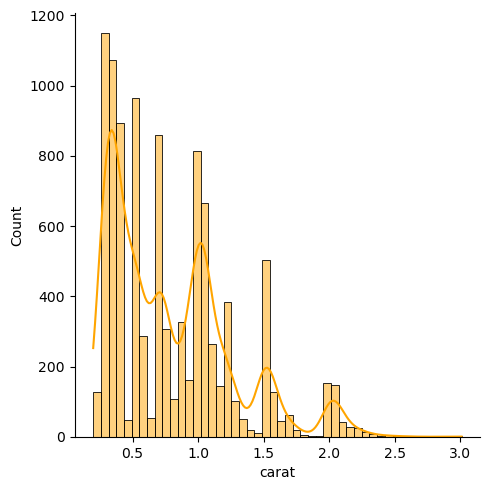

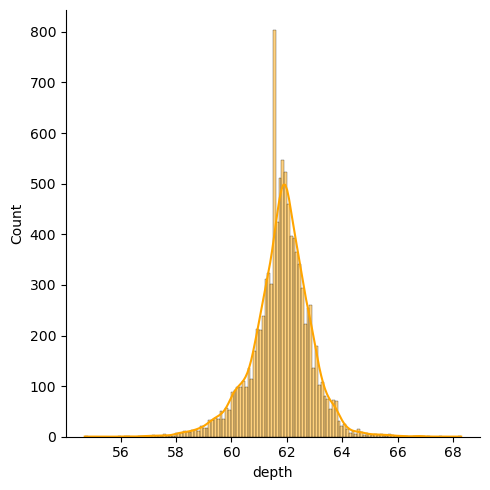

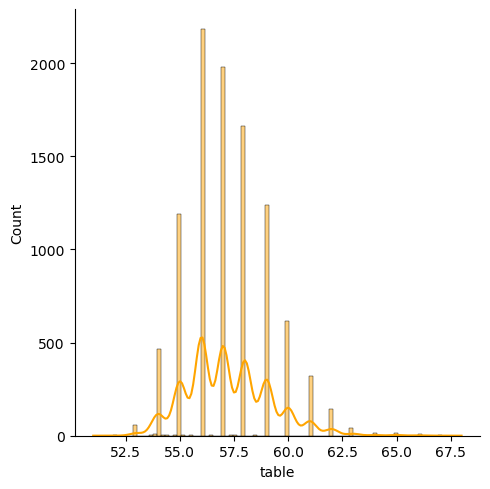

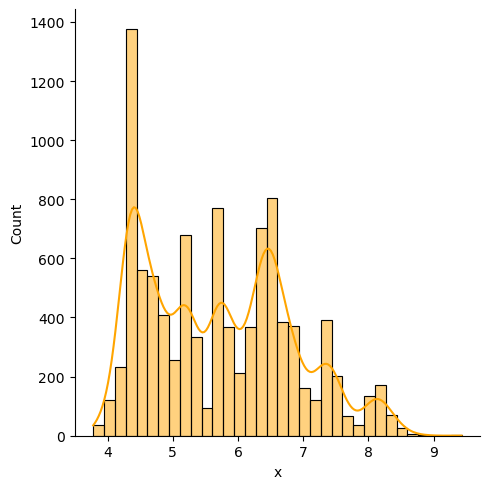

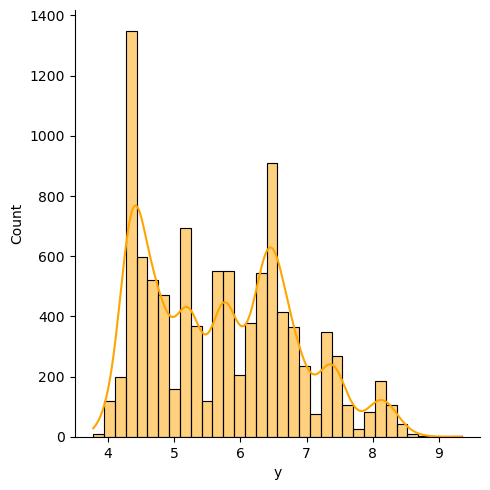

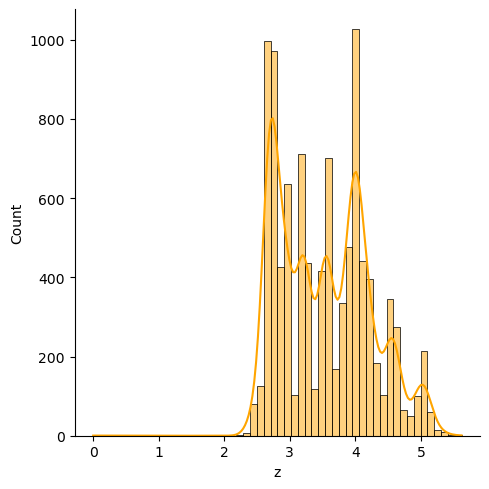

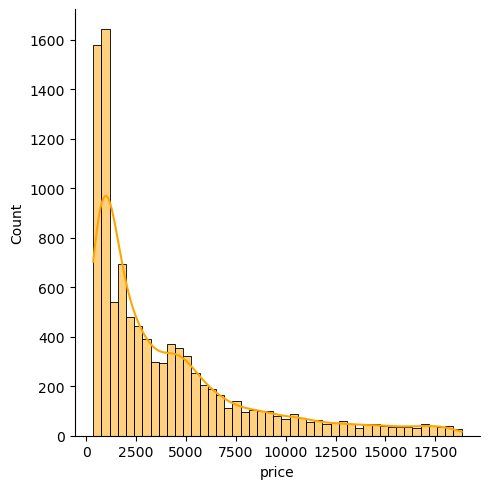

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize=(8,6))
for i in numerical_columns:
    sns.displot(data=df,x=i,kde=True,color='orange')
    plt.show()


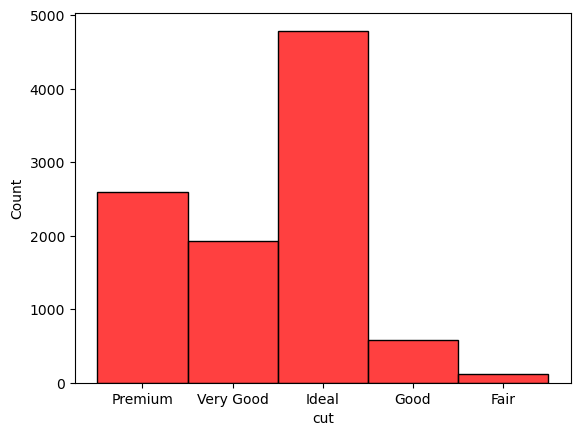

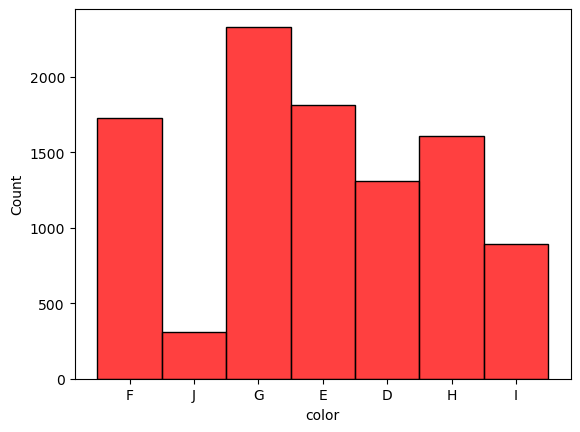

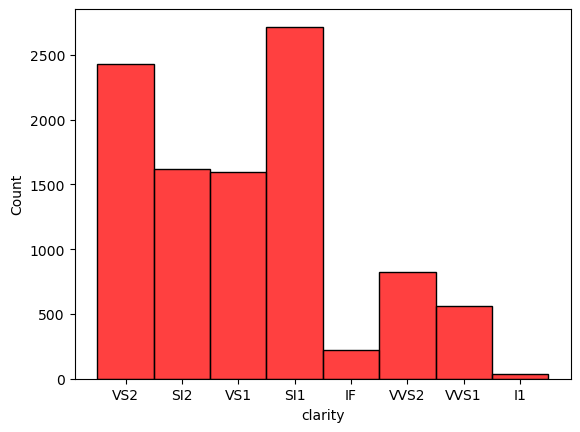

In [17]:
for i in categorical_columns:
    sns.histplot(data=df,x=i,color='red')
    plt.show()

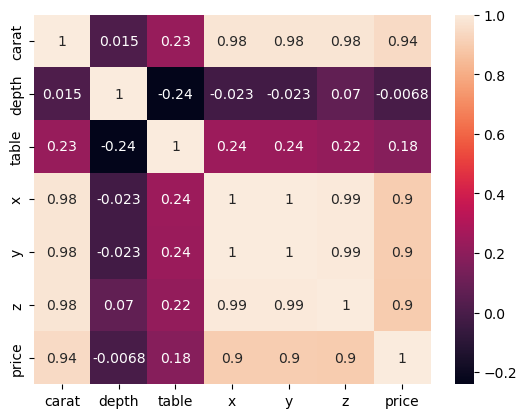

In [18]:
#correlations
sns.heatmap(df[numerical_columns].corr(),annot=True)
plt.show()

In [19]:
# oridinal categories are there you can see
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [20]:
cut_map = {'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5}


In [21]:
df['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [22]:
clarity_map = {'I1':1,'SI2':2,'SI1':3,'VS2':4,'VS1':5,'VVS2':6,'VVS1':7,'IF':8}


In [23]:
df['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [24]:
color_map = {'D':1,'E':2,'F':3,'G':4,'H':5,'I':6,'J':7}

In [25]:
df['cut'] = df['cut'].map(cut_map)
df['clarity'] = df['clarity'].map(clarity_map)
df['color'] = df['color'].map(color_map)